#**Classificação dataset Diabetes** <br>


<b>Resumo:</b>

O objetivo é analisar estatisticamente alguns dos atributos desse dataset <br>

Nota: Cada uma dessas 10 variáveis ​​de recursos foi centralizada na média e dimensionada pelo desvio padrão vezes a raiz quadrada de n_samples(ou seja, a soma dos quadrados de cada coluna totaliza 1).

<b>Data set URL : </b>

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


<b>Descrição:</b>

Este projeto é realizado para  a disciplina Tópicos Especiais em Computação I (Introdução à Ciência de Dados).

<b>Número de Instâncias:</b>

442

<b>Atributos:</b>
<li>idade
<li>sexo
<li>índice de massa corporal bmi
<li>pressão arterial média bp
<li>s1 tc, colesterol sérico total
<li>s2 ldl, lipoproteínas de baixa densidade
<li>s3 hdl, lipoproteínas de alta densidade
<li>s4 tch, colesterol total/HDL
<li>s5 ltg, possivelmente log do nível de triglicerídeos séricos
<li>s6 glu, nível de açúcar no sangue




## <b>Importando Bibliotecas

In [301]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import math
from scipy.stats import kurtosis, skew
%matplotlib inline

## <b>Carregando a Base de Dados


In [302]:
# carregando dataset Diabetes
from sklearn import datasets
# Load the dataset
diabetes = datasets.load_diabetes()

In [303]:
print(type(diabetes['data']))

<class 'numpy.ndarray'>


In [304]:
print(list(diabetes))

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [305]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Os 178 pontos de dados em cada um dos 13 grupos de dados, formatados como uma matriz de 150x13

In [306]:
print(diabetes['data'][:2])


[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]


Em qual grupo cada ponto de dados está (0, 1 ou 2)

In [307]:
print(diabetes['target'])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

 Convertendo dados em um quadro de dados

In [308]:
data = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

In [309]:
target = pd.DataFrame(diabetes['target'], columns=['RespostaDeInteresse'])

In [310]:
df = pd.concat([target, data], axis='columns')

# **Exploração de dados**

Plot

resposta de interesse, uma medida quantitativa da progressão da doença um ano após a linha de base .

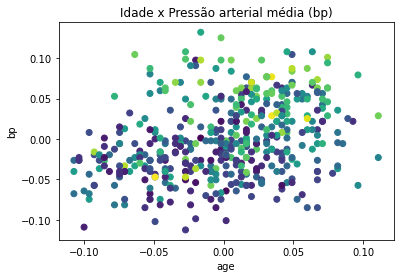

In [311]:
plt.scatter(df['age'], df['bp'], c=df['RespostaDeInteresse'])
plt.title('Idade x Pressão arterial média (bp)')
plt.xlabel('age')
plt.ylabel('bp')
plt.show()

In [312]:
df.head(50)

,RespostaDeInteresse,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,97.0,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,138.0,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,63.0,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,110.0,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,310.0,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RespostaDeInteresse  442 non-null    float64
 1   age                  442 non-null    float64
 2   sex                  442 non-null    float64
 3   bmi                  442 non-null    float64
 4   bp                   442 non-null    float64
 5   s1                   442 non-null    float64
 6   s2                   442 non-null    float64
 7   s3                   442 non-null    float64
 8   s4                   442 non-null    float64
 9   s5                   442 non-null    float64
 10  s6                   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RespostaDeInteresse  442 non-null    float64
 1   age                  442 non-null    float64
 2   sex                  442 non-null    float64
 3   bmi                  442 non-null    float64
 4   bp                   442 non-null    float64
 5   s1                   442 non-null    float64
 6   s2                   442 non-null    float64
 7   s3                   442 non-null    float64
 8   s4                   442 non-null    float64
 9   s5                   442 non-null    float64
 10  s6                   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [315]:
df.describe

<bound method NDFrame.describe of      RespostaDeInteresse       age       sex       bmi        bp        s1  \
0                  151.0  0.038076  0.050680  0.061696  0.021872 -0.044223   
1                   75.0 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449   
2                  141.0  0.085299  0.050680  0.044451 -0.005671 -0.045599   
3                  206.0 -0.089063 -0.044642 -0.011595 -0.036656  0.012191   
4                  135.0  0.005383 -0.044642 -0.036385  0.021872  0.003935   
..                   ...       ...       ...       ...       ...       ...   
437                178.0  0.041708  0.050680  0.019662  0.059744 -0.005697   
438                104.0 -0.005515  0.050680 -0.015906 -0.067642  0.049341   
439                132.0  0.041708  0.050680 -0.015906  0.017282 -0.037344   
440                220.0 -0.045472 -0.044642  0.039062  0.001215  0.016318   
441                 57.0 -0.045472 -0.044642 -0.073030 -0.081414  0.083740   

           s2        s3      

## <b>Verificar Valores nulos

In [316]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Esta função conta as colunas que contêm valor nulo, mas aqui parece que os dados são pré-processados ​​e limpos com valores nulos.

## **Informações estatísticas para conjunto de dados**

In [317]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


##**Aprendendo sobre o atributo** ***age***

---



Transformando os dados para o formato numérico

In [318]:
df['age']=pd.to_numeric(df['age'],errors='coerce')

In [319]:
data.age.value_counts().sort_index()

-0.107226     3
-0.103593     3
-0.099961     2
-0.096328     4
-0.092695     4
-0.089063     3
-0.085430     5
-0.081798     2
-0.078165     4
-0.074533     8
-0.070900     6
-0.067268     3
-0.063635     4
-0.060003     7
-0.056370     6
-0.052738    14
-0.049105     7
-0.045472     9
-0.041840    11
-0.038207     6
-0.034575     6
-0.030942     5
-0.027310    15
-0.023677    10
-0.020045     7
-0.016412     7
-0.012780     4
-0.009147    11
-0.005515    12
-0.001882    14
 0.001751    12
 0.005383    13
 0.009016    16
 0.012648    14
 0.016281    19
 0.019913    11
 0.023546    12
 0.027178     9
 0.030811    12
 0.034443     9
 0.038076    10
 0.041708    17
 0.045341    14
 0.048974    11
 0.052606     4
 0.056239     5
 0.059871     7
 0.063504     6
 0.067136    13
 0.070769     7
 0.074401     6
 0.078034     1
 0.081666     5
 0.085299     1
 0.088931     1
 0.092564     1
 0.096197     2
 0.110727     2
Name: age, dtype: int64

Gráfico de barras do atributo age das 25 primeiras amostras

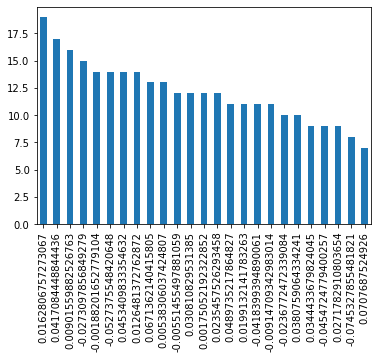

In [320]:
data['age'].value_counts().head(25).plot.bar()

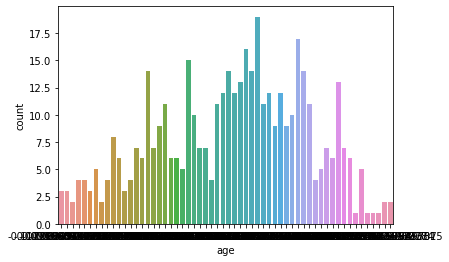

In [321]:
sns.countplot(x='age', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


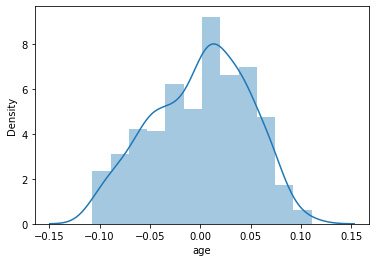

In [322]:
sns.distplot(data['age'])

O Countplot é um gráfico em formato de barra, onde “x” é o atributo escolhido, e “y” é a quantidade de vezes que esse atributo aparece.

Text(0.5, 1.0, 'As 30 medidas mais frequentes do atributo Age')

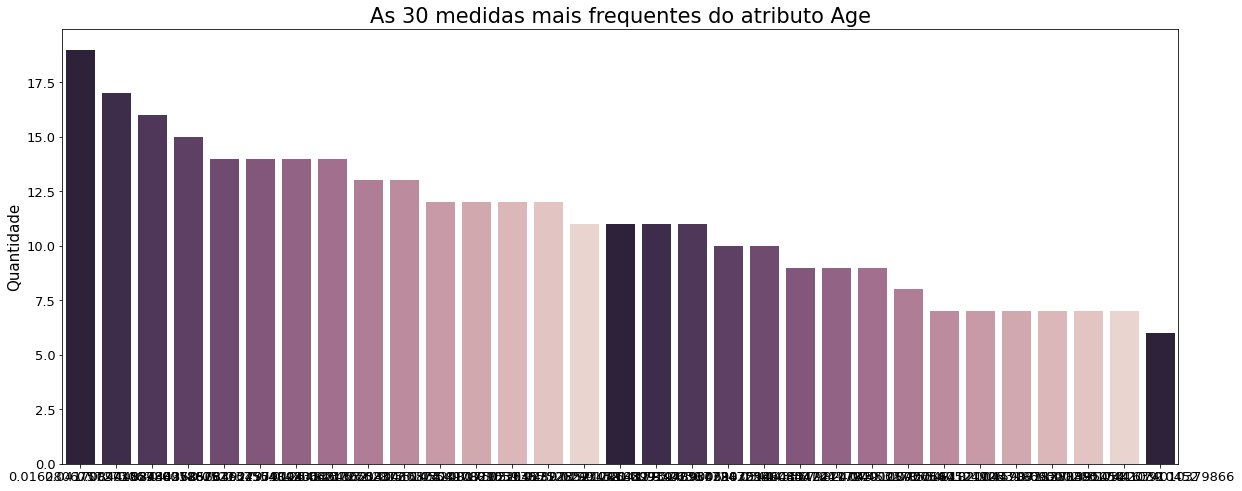

In [323]:
palette_genre_cubehelix = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(20,8))
sns.countplot(x=data['age'], order = data['age'].value_counts().index ,palette=palette_genre_cubehelix,data=data)
plt.xlim(-0.5,30.5)
plt.xlabel('')
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('As 30 medidas mais frequentes do atributo Age',fontsize=21)

Analisando o gráfico podemos perceber que existe uma grande variedade do teor alcoólico percentual do vinho.





São classificados e denominados vinhos nobres, aqueles elaborados no território nacional exclusivamente a partir de uvas da espécie Vitis vinifera que apresentarem teor alcoólico de 14,1% (quatorze e um décimo por cento) a 16% (dezesseis por cento), em volume.
Fonte: https://www.in.gov.br/materia/-/asset_publisher/Kujrw0TZC2Mb/content/id/5809096/do1-2018-03-09-instrucao-normativa-n-14-de-8-de-fevereiro-de-2018-5809092

Calculando a média aritmética

In [324]:
df["age"].mean()

-3.6342849293088766e-16

In [325]:
AGE = df["age"]

In [326]:
AGE.mean()

-3.6342849293088766e-16

Média geométrica

In [327]:
gmean(AGE)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


nan

Média Harmônica

Mediana

In [328]:
AGE.median()

0.00538306037424807

Moda

In [329]:
AGE.mode()

0    0.016281
dtype: float64

*Variância*

In [330]:
AGE.var()

0.0022675736961452935

Desvio padrão

In [331]:
AGE.std()

0.04761904761904939

Valor máximo

In [332]:
AGE.max()

0.110726675453815

Valor mínimo

In [333]:
AGE.min()

-0.107225631607358

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [334]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [335]:
so = df["age"]

In [336]:
calcula_estatisticas(so)

Media: -0.0
Moda: 0.01
Mediana: 0.02
Variância: 0.0
Desvio Padrão: 0.05
Coeficiente Person: -0.23
Coeficiente de Kurtosi: -0.68


Como nesse caso a média, a moda e a mediana tem valores bem próximos, temos uma  Distribuição  quase Simétrica.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


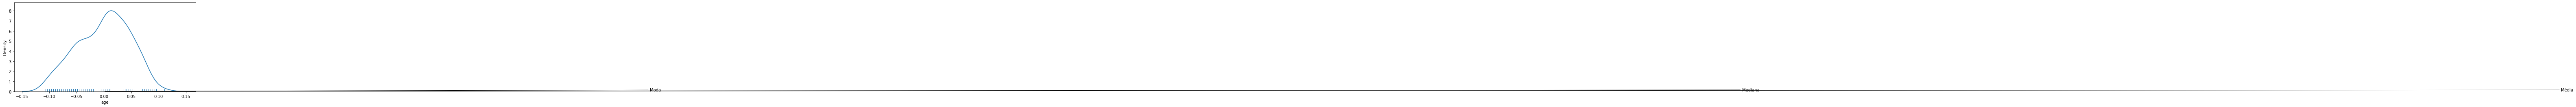

In [337]:
fig = plt.figure(figsize=(8, 4))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(0.01,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(0.02, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(0, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()


Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

Correlação entre diferentes recursos usando o mapa de correlação

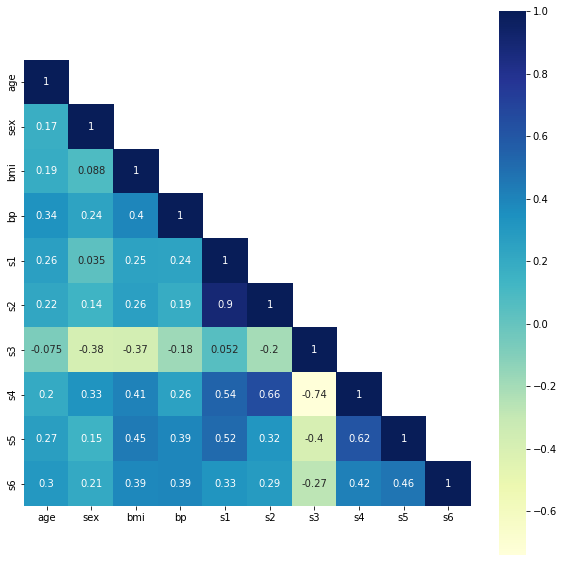

In [338]:
correlation= data.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

In [339]:
correlation['age'].sort_values(ascending=False)

age    1.000000
bp     0.335427
s6     0.301731
s5     0.270777
s1     0.260061
s2     0.219243
s4     0.203841
bmi    0.185085
sex    0.173737
s3    -0.075181
Name: age, dtype: float64

##**Aprendendo sobre o atributo** ***RespostaDeInteresse***

A resposta de interesse, uma medida quantitativa da progressão da doença um ano após a linha de base .

Transformando os dados para o formato numérico

In [340]:
df['RespostaDeInteresse']=pd.to_numeric(df['RespostaDeInteresse'],errors='coerce')

In [ ]:
diabetes.RespostaDeInteresse.value_counts().sort_index()

Gráfico de barras do atributo RespostasDeInteresse das 25 primeiras amostras

In [ ]:
diabetes['RespostaDeInteresse'].value_counts().head(25).plot.bar()

In [ ]:
sns.countplot(x='RespostaDeInteresse', data=diabetes)

In [ ]:
sns.distplot(diabetes['RespostaDeInteresse'])

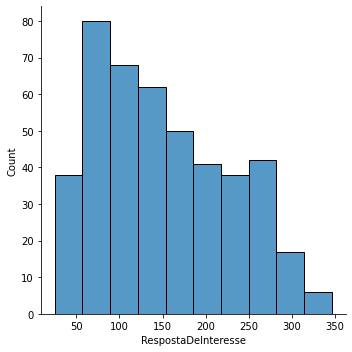

In [344]:
sns.displot(df['RespostaDeInteresse'])

Foi possível analisar a progressão do diabetes que está representada pelo atributo RespostaDeInteresse porque esta era a única coluna que não havia sido padronizada.

Calculando a média aritmética

In [345]:
df["RespostaDeInteresse"].mean()

152.13348416289594

In [346]:
RESPOSTADEINTERESSE = df["RespostaDeInteresse"]

In [347]:
RESPOSTADEINTERESSE.mean()

152.13348416289594

Média geométrica

In [348]:
gmean(RESPOSTADEINTERESSE)

131.80491650792933

Média Harmônica

In [349]:
hmean(RESPOSTADEINTERESSE)

112.1426789020187

Mediana

In [350]:
RESPOSTADEINTERESSE.median()

140.5

Moda

In [351]:
RESPOSTADEINTERESSE.mode()

0     72.0
1    200.0
dtype: float64

*Variância*

In [352]:
RESPOSTADEINTERESSE.var()

5943.331347923785

Desvio padrão

In [353]:
RESPOSTADEINTERESSE.std()

77.09300453299109

Valor máximo

In [354]:
RESPOSTADEINTERESSE.max()

346.0

Valor mínimo

In [355]:
RESPOSTADEINTERESSE.min()

25.0

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [356]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [357]:
s1 = df["RespostaDeInteresse"]

In [358]:
calcula_estatisticas(s1)

Media: 152.13
Moda: 140.5
Mediana: 72.0
Variância: 5929.88
Desvio Padrão: 77.01
Coeficiente Person: 0.44
Coeficiente de Kurtosi: -0.89


Como nesse caso a média, a moda e a mediana tem valores bem próximos, temos uma  Distribuição  quase Simétrica.

In [ ]:
fig = plt.figure(figsize=(50, 30))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(140.5,0.01), xytext=(10, 100),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(72.0, 0.01), xytext=(30, 100),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(152.13, 0.01), xytext=(45, 100),arrowprops={'arrowstyle': '-'})
plt.show()


Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)